In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
from haversine import haversine
import matplotlib.pyplot as plt

In [3]:
def find_kilometers_per_degree_longitude(lat):
    """Returns the distance in kilometers traveling one degree longitudinally at a latitude"""
    return haversine((lat, 0), (lat, 1))

In [4]:
df = pd.read_csv("inaturalist-puma-concolor-2021-06-21-clean.csv").set_index("gbifID")

At the equator, traveling one degree longitudinally would take 111 km. However, at the poles, traveling one degree longitudinally takes 0 km. In general, as we move towards the poles, the actual longitudinally distance between two points decreases.

In [5]:
print(find_kilometers_per_degree_longitude(-90))
print(find_kilometers_per_degree_longitude(0))
print(find_kilometers_per_degree_longitude(90))

6.8086485356391085e-15
111.1950802335329
6.8086485356391085e-15


In our dataset, a degree of longitude can represent anywhere between 62 and 111 km.

In [6]:
kilometers_per_degree_longitude = df["latitude"].apply(
    find_kilometers_per_degree_longitude
)

In [7]:
kilometers_per_degree_longitude.describe()

count    2785.000000
mean       91.556665
std         8.654723
min        62.091114
25%        87.061434
50%        91.742441
75%        94.977474
max       111.194846
Name: latitude, dtype: float64

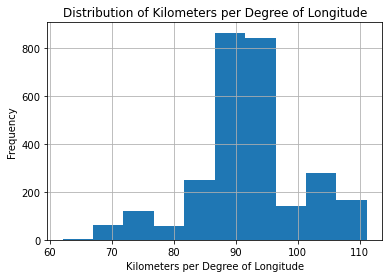

In [8]:
plt.title("Distribution of Kilometers per Degree of Longitude")
kilometers_per_degree_longitude.hist()
plt.xlabel("Kilometers per Degree of Longitude")
plt.ylabel("Frequency")
plt.show()

The closer to uniform this distribution is the less of an issue we have. Because we are dealing with a species with a wide lateral range, we will run into potential when applying the Euclidean metric to the dataset: observations that are closer to the poles will appear farther apart to the euclidean metric than points closer to the equator.  

For species with a realitively small lateral range, the difference between havesine and Euclidean distance will be minimal.

The difference between haversine and Euclidean distances is relevant because k-means implicitly Euclidean: when it updates a cluster's centroid while taking the mean of the points in the cluster, it minimizes the squared Euclidean distance between the centroid and the points in the cluster.